# Analise - chamadas para 911

#### Para este projeto estaremos analisando alguns dados de chamadas do 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude

* lng: Variável String, Longitude

* desc: Variável String, Descrição da Chamada de Emergência

* zip: Variável String, CEP 

* título: Variável String, Título

* timeStamp: Variável String,

* twp: Variável String, Township

* addr: Variável String, Endereço

* e: Variável String, variável Dummy (sempre 1)

In [2]:
# Importando as bibliotecas 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importando o data frame

df = pd.read_csv('C:\\Users\\hanie\\Desktop\\DataFrames\\911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626350 entries, 0 to 626349
Data columns (total 9 columns):
lat          626350 non-null float64
lng          626350 non-null float64
desc         626350 non-null object
zip          549986 non-null float64
title        626350 non-null object
timeStamp    626350 non-null object
twp          626081 non-null object
addr         626350 non-null object
e            626350 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 43.0+ MB


In [5]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Top 5 ceps na chamada

df['zip'].value_counts().head(5)

19401.0    42686
19464.0    41217
19403.0    32788
19446.0    30394
19406.0    21288
Name: zip, dtype: int64

In [7]:
#Principais 5 municipios

df['twp'].value_counts().head(5)

LOWER MERION    52745
ABINGTON        37747
NORRISTOWN      35148
UPPER MERION    34280
CHELTENHAM      28874
Name: twp, dtype: int64

In [8]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [9]:
#Criando coluna da razão das chamadas

df['razao'] = df['title'].apply(lambda title: title.split(':')[0])

In [10]:
df['razao'].value_counts()

EMS        312255
Traffic    220351
Fire        93744
Name: razao, dtype: int64

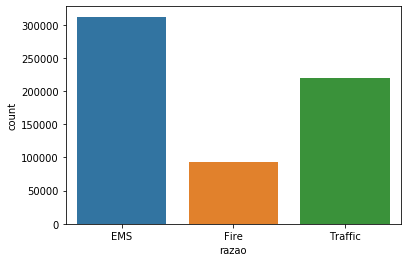

In [11]:
#Countplot da causa da chamada para 911

sns.countplot(x='razao', data =df)

In [12]:
type(df['timeStamp'].iloc[1])

str

In [13]:
# Transformando coluna timeStamp string para dateTime

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Criando tabela hour day e month para timeStamp

df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [16]:
# Mudando numeros para nome da tabela 'day'

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['day'] = df['day'].map(dmap)

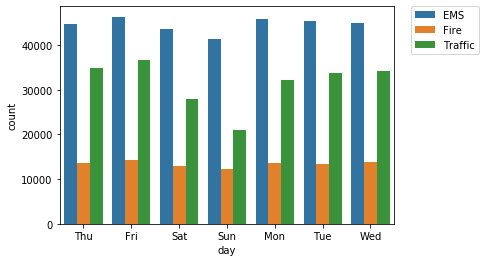

In [18]:
# Grafico day da tabela razao 
sns.countplot(x='day', data= df, hue= 'razao')

# Realocando a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

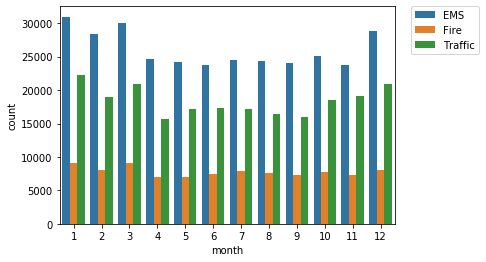

In [19]:
# Grafico Month da tabela razao
sns.countplot(x='month', data= df, hue= 'razao')

# Realocando a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
# Agrupando o Data frame pela coluna do mês

pMes = df.groupby('month').count()
pMes.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,razao,hour,day
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,47343,47343,47343,41581,47343,47343,47329,47343,47343,47343,47343,47343
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


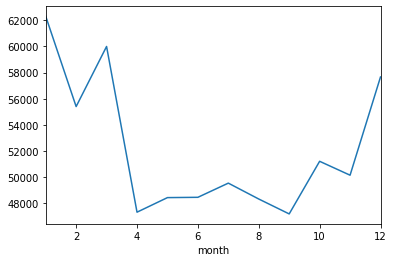

In [21]:
# Quantidade de chamadas por mês 

pMes['twp'].plot()

In [22]:
# Agrupando o Data frame pela coluna do dia

pDay = df.groupby('day').count()
pDay.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,razao,hour,month
day,,,,,,,,,,,,
Fri,97297,97297,97297,85337,97297,97297,97255,97297,97297,97297,97297,97297
Mon,91324,91324,91324,80395,91324,91324,91289,91324,91324,91324,91324,91324
Sat,84587,84587,84587,73856,84587,84587,84541,84587,84587,84587,84587,84587
Sun,74428,74428,74428,65254,74428,74428,74395,74428,74428,74428,74428,74428
Thu,93119,93119,93119,81777,93119,93119,93092,93119,93119,93119,93119,93119


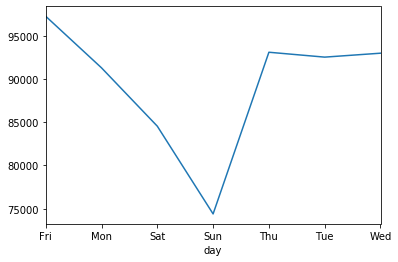

In [23]:
pDay['twp'].plot()

In [24]:
# Agrupando o Data frame pela coluna das horas

pHour = df.groupby('hour').count()
pHour.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,razao,month,day
hour,,,,,,,,,,,,
0,13022,13022,13022,11505,13022,13022,13011,13022,13022,13022,13022,13022
1,11038,11038,11038,9865,11038,11038,11020,11038,11038,11038,11038,11038
2,10060,10060,10060,8968,10060,10060,10043,10060,10060,10060,10060,10060
3,8946,8946,8946,7968,8946,8946,8936,8946,8946,8946,8946,8946
4,8663,8663,8663,7747,8663,8663,8654,8663,8663,8663,8663,8663


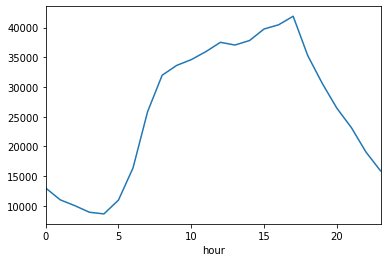

In [25]:
pHour['twp'].plot()

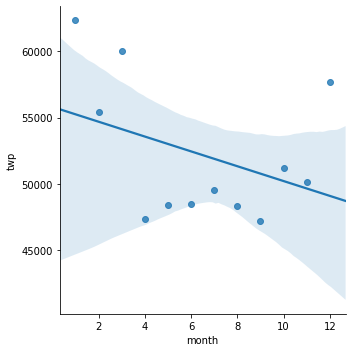

In [26]:
# Modelo de regressão linear baseado no mês

sns.lmplot(x='month', y='twp', data=pMes.reset_index())

In [27]:
df['data'] = df['timeStamp'].apply(lambda t: t.date())

In [28]:
df['data'].head(5)

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: data, dtype: object

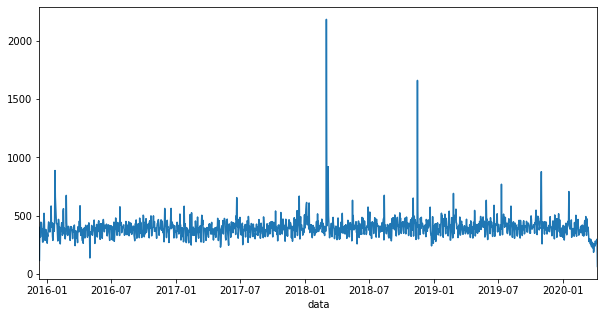

In [29]:
# Plot de contagem das chamadas para 911

plt.figure(figsize=(10,5))
df.groupby('data').count()['twp'].plot()

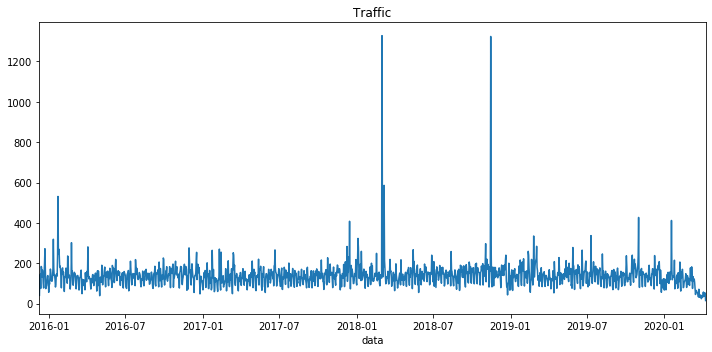

In [30]:
# plot de quantidade das chamadas para 911 no qual a razao foi 'traffic'

plt.figure(figsize=(10,5))
df[df['razao']=='Traffic'].groupby('data').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

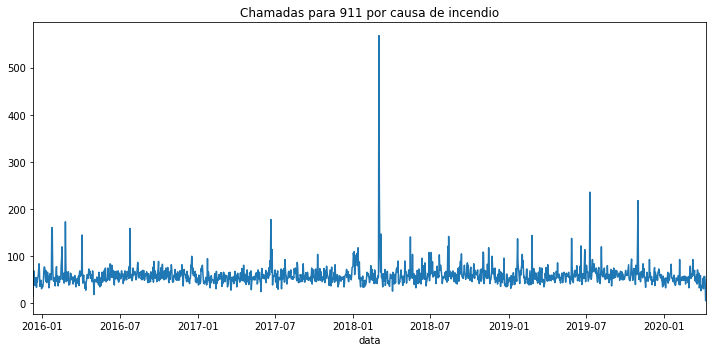

In [31]:
# plot de quantidade das chamadas para 911 no qual a razao foi 'Fire'

plt.figure(figsize=(10,5))
df[df['razao']=='Fire'].groupby('data').count()['twp'].plot()
plt.title('Chamadas para 911 por causa de incendio')
plt.tight_layout()

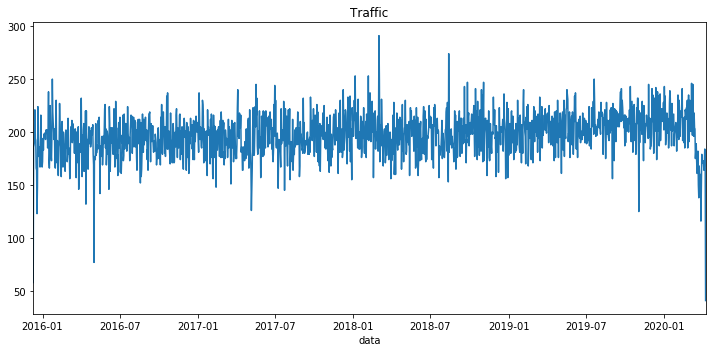

In [32]:
# plot de quantidade das chamadas para 911 no qual a razao foi 'EMS'

plt.figure(figsize=(10,5))
df[df['razao']=='EMS'].groupby('data').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

In [33]:
# Criando um mapa de calor do dia e hora baseado na razao das chamadas

dayHour = df.groupby(by=['day','hour']).count()['razao'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,1855,1523,1361,1234,1231,1543,2547,3972,4805,4995,...,6033,6645,6708,6776,5355,4768,4112,3663,3224,2693
Mon,1771,1465,1283,1193,1257,1736,2557,4259,5294,5442,...,5339,5841,6013,6103,5158,4239,3562,3056,2501,1954
Sat,2301,1947,1801,1501,1366,1483,1773,2380,3286,4098,...,5117,4887,4905,4926,4722,4496,3913,3677,3037,2805
Sun,2299,2034,1835,1520,1390,1388,1647,2275,2859,3531,...,4447,4215,4276,4261,4149,3930,3520,2954,2458,2183
Thu,1616,1313,1329,1161,1192,1671,2682,4268,5097,5105,...,5691,6113,6017,6610,5221,4424,3856,3295,2679,2220


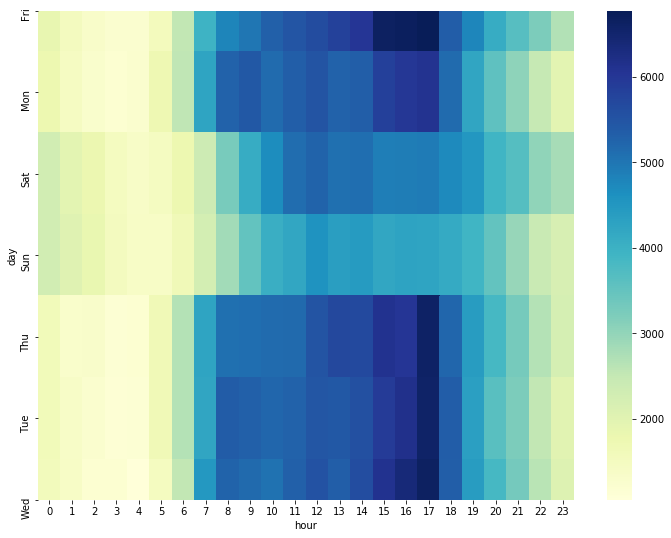

In [34]:
# mapa de calor relação DIA X HORA

plt.figure(figsize=(12,9))
sns.heatmap(dayHour, cmap="YlGnBu")

In [35]:
dayMonth = df.groupby(by=['day','month']).count()['razao'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Fri,9309,8255,10941,7180,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,7465,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,6788,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6174,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,6427,7524,7850,6964,7508,6954,7482,8358,8151


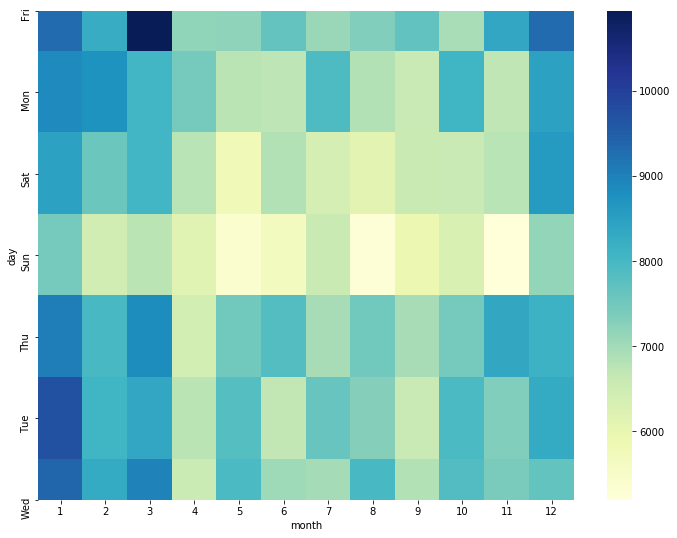

In [36]:
# mapa de calor relação DIA X MÊS

plt.figure(figsize=(12,9))
sns.heatmap(dayMonth, cmap="YlGnBu")